# Divertiamoci un po' con numpy

Ci sono diverse cose necessarie da sapere per iniziare ad usare numpy in maniera efficace. Non voglio fare una lista lunga e noiosa di funzionalità, ma cercherò di mostrare le caratteristiche di questa potente libreria attraverso esempi.

- come creare vari tipi di array 
- come effettuare operazioni vettorizzate
- come effettuare operazioni algebriche standard tra array

## Calcolo e grafico di un polinomio

Consideriamo un polinomio, per esempio
$$
x^3 - 2x^2 +7x +2
$$
e diciamo che vogliamo calcolarne il valore su un intervallo che va da -10 a 10, su 1000 punti equidistanti in questo intervallo.

Questa cosa si può fare in due passi:
1. costruire un array con tutti i punti -10, -9.99, -9.98, ..., 9.97, 9.98, 9.99, 10.
2. calcolare su ognuno di essi il valore del polinomio

### Step 1: usiamo `linspace`

Crea una sequenza di valori equidistanti da un inizio ad una fine, inclusi.


In [1]:
import numpy as np

In [2]:
x = np.linspace(-10,10,1000)
print(x[:30])  # I primi trenta valori
print(x[-30:]) # gli ultimi trenta valori

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992
  -9.8998999   -9.87987988  -9.85985986  -9.83983984  -9.81981982
  -9.7997998   -9.77977978  -9.75975976  -9.73973974  -9.71971972
  -9.6996997   -9.67967968  -9.65965966  -9.63963964  -9.61961962
  -9.5995996   -9.57957958  -9.55955956  -9.53953954  -9.51951952
  -9.4994995   -9.47947948  -9.45945946  -9.43943944  -9.41941942]
[ 9.41941942  9.43943944  9.45945946  9.47947948  9.4994995   9.51951952
  9.53953954  9.55955956  9.57957958  9.5995996   9.61961962  9.63963964
  9.65965966  9.67967968  9.6996997   9.71971972  9.73973974  9.75975976
  9.77977978  9.7997998   9.81981982  9.83983984  9.85985986  9.87987988
  9.8998999   9.91991992  9.93993994  9.95995996  9.97997998 10.        ]


### Step 2: calcoliamo il valore del polinomio su tutti questi punti

Usiamo operazioni che vengono applicate **in parallelo** a tutti gli elementi di un array.



In [3]:
y = x**3 - 2*x**2 + 7*x + 2

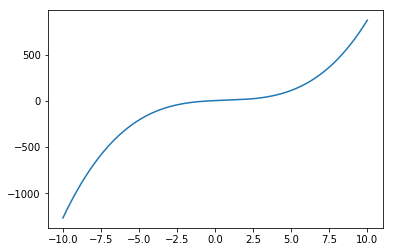

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y)

### Come è stato effettuato il calcolo del valore del polinomio?

Quello che è successo è che tutte le operazioni di 
- esponenziazione
- moltiplicazione per un numero
- somma

all'interno dell'espressione `x**3 - 2*x**2 + 7*x + 2` sono state effettuate simultaneamente sull'array.

Vediamo tutti i dettagli usando un array più piccolo:

In [31]:
x = np.array([1,2,3,4,5,6])
x

array([1, 2, 3, 4, 5, 6])

In [32]:
A = x**3  # elevazione alla 3a
A

array([  1,   8,  27,  64, 125, 216])

In [34]:
B = x**2 # elevazione alla 2a
B

array([ 1,  4,  9, 16, 25, 36])

In [35]:
C = -2 * B   # moltiplicazione per uno scalare
C

array([ -2,  -8, -18, -32, -50, -72])

In [37]:
D = 7*x     # moltiplicazione per uno scalare
D

array([ 7, 14, 21, 28, 35, 42])

In [47]:
E = A + C + D # sommo i vettori
E

array([  6,  14,  30,  60, 110, 186])

In [48]:
F = E + 2   # sottrazione di una costante
F

array([  8,  16,  32,  62, 112, 188])

In [45]:
y = x**3 - 2*x**2 + 7*x + 2
y

array([  8,  16,  32,  62, 112, 188])

## Vettorizzazione di una funzione qualunque
 
Per ogni operazione algebrica viene creato un intero nuovo array con i valori temporanei. Questo non e necessariamente un problema se l'array non è troppo grande. E potrebbe risultare anche più efficiente in certi casi.

Tuttavia è possibile costruire una funzione python che (allo stesso modo delle funzioni `np.sin`, o degli operatori algebrici) venga applicato in parallelo a tutti gli elementi del vettore.

In [7]:
def polinomio(x):
    return x**3 - 2*x**2 + 7*x + 2

polinomio = np.vectorize(polinomio)

In [8]:
y = polinomio(x)

In [9]:
type(y)

numpy.ndarray

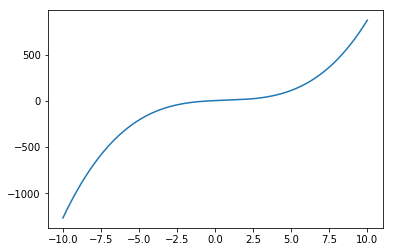

In [10]:
plt.plot(x,y)

In [18]:
def f(value):
    return round(value)+2

fvect = np.vectorize(f)

In [19]:
y = fvect(x)

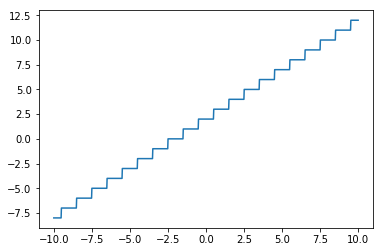

In [20]:
plt.plot(x,y)